# <center>Machine Learning Lab: Exercise Sheet 8</center>
<center> <b>Submitted By: Mohit Bansal</b></center>
<center> <b>Student ID: 279314</b></center>

**1. Recommender Datasets:** You can use one of the two datasets (or optionally, both datasets).
+ (a) movielens 100k dataset D1: Rating prediction dataset (rating scale 1-5): http://grouplens.org/datasets/movielens/100k/
+ (b) Wine Quality called D2: (use winequality-red.csv): http://archive.ics.uci.edu/ml/datasets/Wine+Quality

**2. The RMSE score for rating prediction is available at Mymedialite website: **http://www.mymedialite.net/examples/datasets.html

# Exercise 1: Recommender Dataset (4 Points)

+ Perform the statistical analysis of the two datasets given. 
+ Your analysis should provide as much information as possible. 
+ You must use all the related information of users and movies for the analysis i.e. rating, user (age group, zipcode etc) and item(genre, title, release date etc). 
+ The grading of this task depends on the useful information extracted from the given datasets, which can help in the learning process.
+ Use tables, graphs to represent your information.

## Loading & Preparing Datasets

In [166]:
# Import Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading training data
path = '/Users/mundanemohit/Google Drive/My Work/MSc. Data Analytics/WiSe 18/3113 Machine Learning Lab/Excercises/Ex8'
os.chdir(path)

# User data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
userDF = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

In [167]:
userDF.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [7]:
# Ratings data 

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratingDF = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
ratingDF.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [168]:
# the movies file contains columns indicating the movie title & genre
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movieDF = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

movieDF.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [169]:
# create one merged DataFrame
mov_ratDF = pd.merge(movieDF, ratingDF)
movielensDF = pd.merge(userDF, mov_ratDF)
movielensDF  = movielensDF.drop(['video_release_date', 'imdb_url', 'unix_timestamp'], axis=1)
movielensDF.head()

,user_id,age,sex,occupation,zip_code,movie_id,title,release_date,rating
0,1,24,M,technician,85711,1,Toy Story (1995),01-Jan-1995,5
1,1,24,M,technician,85711,2,GoldenEye (1995),01-Jan-1995,3
2,1,24,M,technician,85711,3,Four Rooms (1995),01-Jan-1995,4
3,1,24,M,technician,85711,4,Get Shorty (1995),01-Jan-1995,3
4,1,24,M,technician,85711,5,Copycat (1995),01-Jan-1995,3


## Preprocessing and Data Visualization

### User Data:

Let's analyze our user-base first.

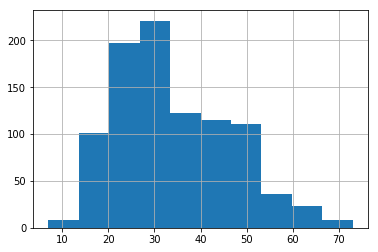

In [54]:
userDF.head()
userDF['age'].hist()
plt.show()

So our user base includes people aged 7 to 75. However, most of it is concentrated between ages 20 to 33.

M    670
F    273
Name: sex, dtype: int64


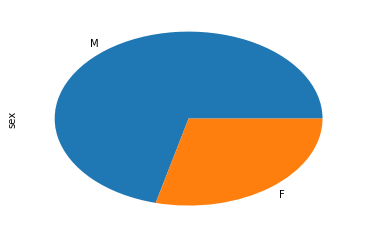

In [58]:
print(userDF['sex'].value_counts())
userDF['sex'].value_counts().plot(kind = 'pie')
plt.show()

70% of our user base is male.

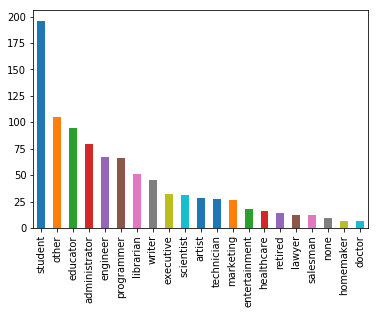

In [80]:
userDF['occupation'].value_counts().plot(kind = 'bar')
plt.show()

+ Most of our user-base is comprised of students and educators
+ Majority of our users are from IT background (Engineer, programmer etc.) 

### Movie Data:

Let's summarize movie ratings before doing our analysis

In [83]:
ratings_mean_count = pd.DataFrame(movielensDF.groupby('title')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movielensDF.groupby('title')['rating'].count())  
ratings_mean_count.head()

,rating,rating_counts
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


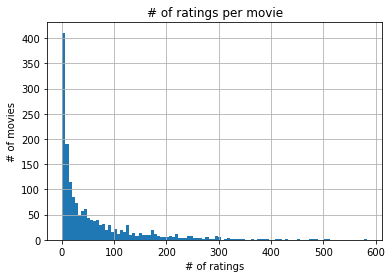

In [75]:
# Plot no. of ratings
ratings_mean_count['rating_counts'].hist(bins=100)  
plt.title('# of ratings per movie')
plt.xlabel('# of ratings')
plt.ylabel('# of movies')
plt.show()

So we can see that,
+ Most of the movies have been rated less than 50 times
+ 400+ movies have recieved a 5 or less ratings



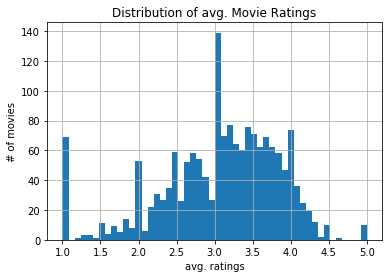

In [77]:
# Plot avg. ratings
ratings_mean_count['rating'].hist(bins=50)
plt.title('Distribution of avg. Movie Ratings')
plt.xlabel('avg. ratings')
plt.ylabel('# of movies')
plt.show()

+ Maximum movies have an average rating of 3
+ There are a lot of movies with 1 rating
+ Most of the movies have average ratings between 2 and 4.5

**Now let's see if there is a correlation between number of ratings and the average rating. This is to see if popular movies have a higher average rating.

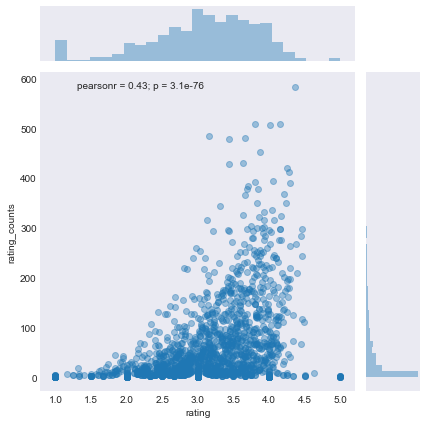

In [85]:
import seaborn as sns  
sns.set_style('dark')  

sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

Our hypothesis is confirmed. Most of the high-rated movies have high rating counts as well. However, this is a positive sign for a recommender system since we would want to recommend good movies based on the opinion of a large collective rather than a single individual.

# Exercise 2: Implement basic matrix factorization (MF) technique for recommender systems (8 Points)

In this task you are required to implement a matrix factorization (MF) technique for recommender systems (see Annex 1). 
+ You are given a rating matrix $R^{n×m}$ and you have to learn latent matrices $P^{n×k}$ and $Q^{m×k}$
+ Where n is the number of users, m is the number of items and k the latent dimensions. 
+ You can solve the MF problem by implementing Stochastic Gradient Descent (SGD) or Alternating Least Square (ALS) or Coordinate Descent (CD) learning algorithms. 
+ You will follow a 3-fold cross validation protocol with train, validation and test data splits. 
+ Measure the prediction quality (the RMSE score) on the test dataset.
+ Normalize your data
+ Optimize the hyper-parameters i.e. λ regularization constant, α learning rate, k latent dimensions.
+ Compute the test RMSE (averaged across the 3-folds)

### PROCEDURE:

**Step 1: Create user-item matrix R**

In [92]:
user_movie_rating = movielensDF.pivot_table(index='user_id', columns='title', values='rating')  
user_movie_rating.head()
R = np.matrix(user_movie_rating.fillna(0))
R

matrix([[0., 0., 2., ..., 0., 4., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

** Step 2: Define helper functions**

+ **RMSE**: To calculate error
+ **FULL MATRIX**: To calculate full matrix based on P, Q & biases
+ **GET RATING**: Calculate rating of individual item

In [114]:
def rmse(R, predicted):
        """
        A function to compute the total mean square error
        """
        xs, ys = R.nonzero()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

In [ ]:
def full_matrix(P, Q, b, b_u, b_i):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return b + b_u[:,np.newaxis] + b_i[np.newaxis:,] + P.dot(Q.T)


In [170]:
def get_rating(P, Q, b, b_u, b_i, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = b + b_u[i] + b_i[j] + P[i, :].dot(Q[j, :].T)
        return prediction

** Step 3: Define SGD Function**

In [115]:
def sgd(samples, alpha, beta, P, Q, b, b_u, b_i):
    """
    Perform stochastic graident descent
    """
    for i, j, r in samples:
        # Computer prediction and error
        prediction = get_rating(P, Q, b, b_u, b_i, i, j)
        e = (r - prediction)

        # Update biases
        b_u[i] += alpha * (e - beta * b_u[i])
        b_i[j] += alpha * (e - beta * b_i[j])

        # Update user and item latent feature matrices
        P[i, :] += alpha * (e * Q[j, :] - beta * P[i,:])
        Q[j, :] += alpha * (e * P[i, :] - beta * Q[j,:])
    return P, Q, b_u, b_i

** Step 4: Define K-Fold matrix factorization function**

In [132]:
# Create a list of training samples
def train_matrix_factorization(R, k, alpha, beta, iterations = 10):
    """
            Perform matrix factorization to predict empty
            entries in a matrix.
    Arguments
            - R (ndarray)   : user-item rating matrix
            - k (int)       : number of latent dimensions
            - alpha (float) : learning rate
            - beta (float)  : regularization parameter
    """
    num_users = R.shape[0]
    num_items = R.shape[1]
    
    # Initialize user and item latent feature matrice
    P = np.random.normal(scale=1./ k, size=(num_users, k))
    Q = np.random.normal(scale=1./ k, size=(num_items, k))

    # Initialize the biases
    b_u = np.zeros(num_users)
    b_i = np.zeros(num_items)
    b = np.mean(R[np.where(R != 0)])
    
    # Sample non-zero entries
    samples = [
        (i, j, R[i, j])
        for i in range(num_users)
            for j in range(num_items)
                if R[i, j] > 0
            ]

    # Perform stochastic gradient descent for number of iterations
    training_process = []
    for i in range(iterations):
        # For each fold
        fold_accuracy = []
        for fold in range(0,3):
            np.random.shuffle(samples)
            train_sample = samples[:int(len(samples)*2/3)]
            test_sample = samples[int(len(samples)*2/3):]

            # Perform SGD
            P, Q, b_u, b_i = sgd(train_sample, alpha, beta, P, Q, b, b_u, b_i)

            # Get new predicted matrix
            predicted = full_matrix(P, Q, b, b_u, b_i)

            # Calculate RMSE
            error = rmse(R, predicted)
            fold_accuracy.append(error)   

        training_process.append(np.mean(fold_accuracy))
    print("a = %.3f, b = %.3f, k = %d,  error = %.4f" % (alpha, beta, k, np.mean(fold_accuracy)))
    return training_process

**Step 5: Perform matrix-factorization**

Let's now perform matrix factorization for some value of alpha, beta & k

a = 0.100, b = 0.100, k = 100,  error = 193.6745


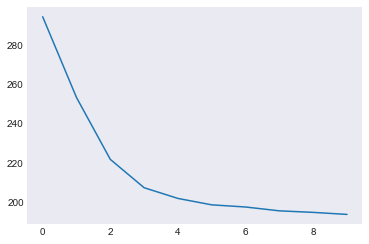

In [133]:
R = np.matrix(user_movie_rating.fillna(0))

RMSEs = train_matrix_factorization(R, k = 100, alpha = 0.1, beta = 0.1, iterations = 10)

plt.plot(RMSEs)
plt.show()

Using our initial values we reached an RMSE of 193.6 within 10 iterations.


**Step 6: Perform grid-search**

We will now do a grid-search to find optimal values for hyper-parameters

In [146]:
alphas = [0.005, 0.01, 0.05]
betas = [0.001, 0.01, 0.1]
ks = [2, 10, 100]

for a in alphas:
    for b in betas:
        for k in ks:
            train_matrix_factorization(R, k, a, b, iterations = 10)

a = 0.005, b = 0.001, k = 2,  error = 284.7872
a = 0.005, b = 0.001, k = 10,  error = 269.4787
a = 0.005, b = 0.001, k = 100,  error = 282.1927
a = 0.005, b = 0.010, k = 2,  error = 286.1880
a = 0.005, b = 0.010, k = 10,  error = 272.9628
a = 0.005, b = 0.010, k = 100,  error = 283.5906
a = 0.005, b = 0.100, k = 2,  error = 288.6219
a = 0.005, b = 0.100, k = 10,  error = 288.7344
a = 0.005, b = 0.100, k = 100,  error = 290.5380
a = 0.010, b = 0.001, k = 2,  error = 276.1422
a = 0.010, b = 0.001, k = 10,  error = 242.1204
a = 0.010, b = 0.001, k = 100,  error = 204.3028
a = 0.010, b = 0.010, k = 2,  error = 274.8162
a = 0.010, b = 0.010, k = 10,  error = 244.1014
a = 0.010, b = 0.010, k = 100,  error = 220.3049
a = 0.010, b = 0.100, k = 2,  error = 283.6599
a = 0.010, b = 0.100, k = 10,  error = 278.5348
a = 0.010, b = 0.100, k = 100,  error = 285.9873


/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app
/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()
/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()
/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app
/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/Users/mundanemohit/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by Interactive

a = 0.050, b = 0.001, k = 2,  error = nan
a = 0.050, b = 0.001, k = 10,  error = nan
a = 0.050, b = 0.001, k = 100,  error = nan
a = 0.050, b = 0.010, k = 2,  error = nan
a = 0.050, b = 0.010, k = 10,  error = nan
a = 0.050, b = 0.010, k = 100,  error = 47.0227
a = 0.050, b = 0.100, k = 2,  error = 276.5456
a = 0.050, b = 0.100, k = 10,  error = 245.6528
a = 0.050, b = 0.100, k = 100,  error = 209.3588


So we now have the optimal values of learning rate, regularization parameter and the number of latent dimensions.

a = 0.050, b = 0.010, k = 100

Let's see the RMSE plot for the optimal result:

a = 0.050, b = 0.010, k = 100,  error = 46.8230


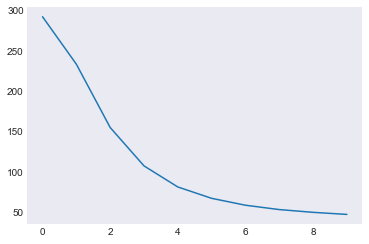

In [162]:
alpha, beta, k = 0.05, 0.01, 100

RMSEs = train_matrix_factorization(R, k, alpha, beta, iterations = 10)

plt.plot(RMSEs)
plt.show()

# Exercise 3: Recommender Systems using matrix factorization libmf / sckit-learn (8 Points)

+ In this task you are required to use off-the-shelf libraries such as libmf or sckit-learn. 
+ You have to learn a matrix factorization model using coordinate descent method. 
+ Optimize the hyper parameters and perform a 3-fold cross validation. 
+ Compare your results with the results in task 1. 
+ List in detail:
    + Which/how you used these libraries?
    + What it solves?, and 
    + Why it is selected?.
+ Present your results in form of plots and tables.


### Non-Negative Matrix Factorization (NMF)

Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X. This factorization can be used for example for dimensionality reduction, source separation or topic extraction.

Let's use the same values of alpha & k and see what RMSE we get with this in-built method

+ **alpha:** Regularization term
+ **solver:** 'cd' for Coordinate Descent
+ **n_components:** Number of latent dimensions

Unfortunately, we cannot specify a learning rate in this function

In [163]:
from sklearn.decomposition import NMF

model = NMF(n_components = k, solver='cd', alpha = beta) 
P = model.fit_transform(R)
Q = model.components_

# Predict R
R_hat = np.dot(P, Q)

print("a = %.3f, b = %.3f, k = %d,  error = %.4f" % (alpha, beta, k, rmse(R, R_hat)))

a = 0.050, b = 0.010, k = 100,  error = 593.5501


It seems like despite using the same hyper-parameters, we get a worse result with the inbuilt NMF library. Let's try to optimize the 2 hyper-parameters (alpha: regularization parameter, k: latent dimensions)

In [165]:
betas = [0.05, 0.01, 0.1]
ks = [2, 10, 100, 300]

for k in ks:        
    for b in betas:
        model = NMF(n_components = k, solver='cd', alpha = b) 
        P = model.fit_transform(R)
        Q = model.components_
        # Predict R
        R_hat = np.dot(P, Q)
        print("b = %.3f, k = %d,  error = %.4f" % (b, k, rmse(R, R_hat)))

b = 0.050, k = 2,  error = 836.5043
b = 0.010, k = 2,  error = 836.4862
b = 0.100, k = 2,  error = 836.5259
b = 0.050, k = 10,  error = 738.4916
b = 0.010, k = 10,  error = 738.4525
b = 0.100, k = 10,  error = 738.5382
b = 0.050, k = 100,  error = 592.5677
b = 0.010, k = 100,  error = 594.1420
b = 0.100, k = 100,  error = 592.9619
b = 0.050, k = 300,  error = 420.3913
b = 0.010, k = 300,  error = 421.3926
b = 0.100, k = 300,  error = 420.6447


It seems that changing the regularization parameter does not have much effect on the RMSE. 

However, the number of latent dimensions are directly correlated to the RMSE. This makes sense, because the more variables you have, the more precise your results can be. But we need to keep in mind that the number of latent dimensions should not exceed the the dimensions of the input matrix. The whole point of matrix factorization is to reduce a sparse matrix into an approximated yet compact product of 2 (or more) matrices. So, increasing the inner-dimension of these factor matrices may give you a more precise result, but it is computationally heavier and thus it is equivalent to storing the matrix in it's original form.

In conclusion, higher number of latent dimensions may eventually lead to a better prediction, but will increase computational time. We need to see the trade-off between speed and precision before deciding the K value.

#### References:
    
+ Creating a Simple Recommender System in Python using Pandas - https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/
+ Matrix Factorization: A Simple Tutorial and Implementation in Python - http://www.albertauyeung.com/post/python-matrix-factorization/